In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col = 'date')

In [3]:
df = df[(df['value'] >= df['value'].quantile(0.025)) &
        (df['value'] <= df['value'].quantile(0.975))]

## Line Plot

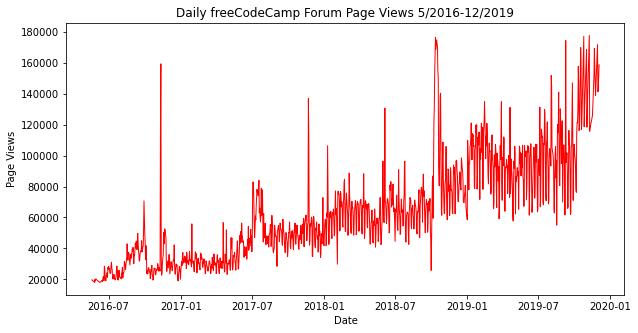

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['value'], 'r', lw=1)

ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views');

## Bar Plot

In [7]:
df['year'] = df.index.year

In [8]:
df['month'] = df.index.month

In [23]:
df_bar = df.groupby(['year', 'month'])['value'].mean()

In [24]:
df_bar = df_bar.unstack()

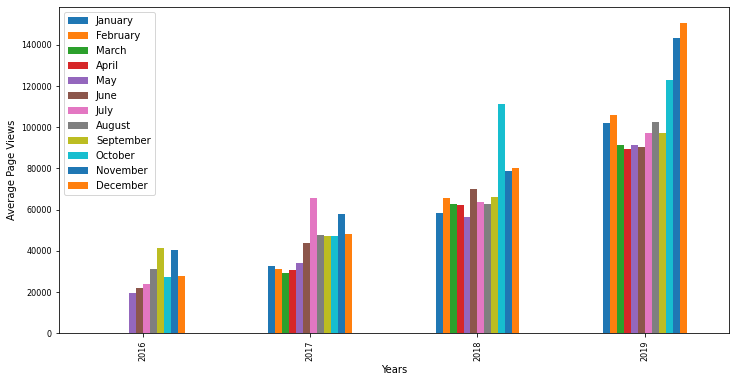

In [27]:
fig = df_bar.plot.bar(figsize=(12, 6), xlabel = 'Years', ylabel = 'Average Page Views')
plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8);

## Box Plot

In [28]:
df_box = df.copy()

In [29]:
df_box.reset_index(inplace=True)

In [30]:
df_box['year'] = [d.year for d in df_box.date]

In [31]:
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [32]:
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


In [33]:
df_box['month_num'] = df_box['date'].dt.month

In [34]:
df_box

,date,value,year,month,month_num
0,2016-05-19,19736,2016,May,5
1,2016-05-26,18060,2016,May,5
2,2016-05-27,19997,2016,May,5
3,2016-05-28,19044,2016,May,5
4,2016-05-29,20325,2016,May,5
...,...,...,...,...,...
1233,2019-11-24,138875,2019,Nov,11
1234,2019-11-29,171584,2019,Nov,11
1235,2019-11-30,141161,2019,Nov,11
1236,2019-12-01,142918,2019,Dec,12


In [35]:
df_box = df_box.sort_values('month_num')

In [36]:
df_box

,date,value,year,month,month_num
210,2017-01-06,37353,2017,Jan,1
937,2019-01-06,94108,2019,Jan,1
936,2019-01-05,77897,2019,Jan,1
935,2019-01-04,94514,2019,Jan,1
934,2019-01-03,100710,2019,Jan,1
...,...,...,...,...,...
567,2017-12-29,72819,2017,Dec,12
566,2017-12-28,51018,2017,Dec,12
565,2017-12-27,43075,2017,Dec,12
201,2016-12-28,28424,2016,Dec,12


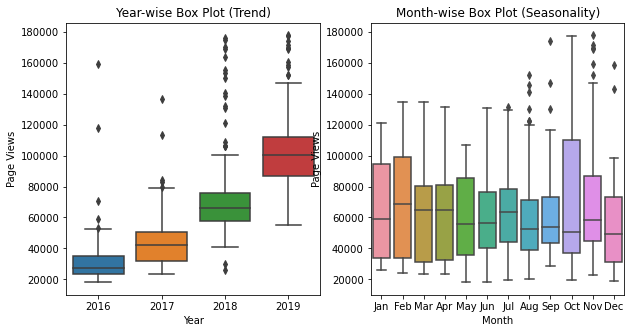

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0] = sns.boxplot(x=df_box['year'], y=df_box['value'], ax=axes[0])
axes[1] = sns.boxplot(x=df_box['month'], y=df_box['value'], ax=axes[1])

axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')

axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')

plt.show()